## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load Data

In [ ]:
path = "../data/sierraleone-bambuna.csv"
df = pd.read_csv(path)
# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sort by time
df = df.sort_values(by="Timestamp").reset_index(drop=True)
print("Shape:", df.shape)
df.head()

Shape: (525600, 19)
An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


## Summary Statistics & Missing-Value Report

In [8]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [11]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56:00,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59:00,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [14]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
67534,2021-09-24 21:35:00,-1.6,-0.4,-1.6,0.0,0.0,25.4,95.5,0.3,0.7,0.5,212.5,0.9,997,0,0.0,25.0,24.2,NaN
149227,2021-11-20 15:08:00,668.5,815.0,127.7,719.1,703.2,38.5,13.2,2.4,3.9,1.0,80.1,12.9,991,0,0.0,54.3,51.2,NaN
399119,2022-05-13 04:00:00,-4.2,-0.3,-3.9,0.0,0.0,30.8,54.5,4.6,5.9,1.0,225.7,13.3,993,0,0.0,30.8,30.2,NaN
120383,2021-10-31 14:24:00,789.1,670.4,250.9,819.0,810.0,37.2,26.1,4.8,5.9,0.6,66.6,8.7,994,0,0.0,55.0,49.5,NaN
397747,2022-05-12 05:08:00,-3.0,-0.4,-2.8,0.0,0.0,29.4,61.8,1.4,1.6,0.4,177.3,5.6,992,0,0.0,28.8,28.2,NaN


In [15]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14 

## Missing Value Report

In [20]:
missing_report = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    "Missing Count": missing_report,
    "Missing %": missing_pct.round(2)
})

missing_df


,Missing Count,Missing %
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


In [22]:
print("List columns with >5% nulls")
high_nulls = missing_pct[missing_pct > 5]
high_nulls

List columns with >5% nulls


Comments    100.0
dtype: float64

## Handle Missing Values (Median Imputation)

In [23]:
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


## Outlier Detection (Z-Scores)

In [24]:
outlier_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

z_scores = np.abs(stats.zscore(df[outlier_cols], nan_policy='omit'))

outliers = (z_scores > 3).sum(axis=0)
outliers


array([  89,    0, 3738,   27,   63, 3109, 3500])

## Remove/Clean Outliers

In [25]:
df_clean = df.copy()
df_clean = df_clean[(z_scores < 3).all(axis=1)]
df_clean.reset_index(drop=True, inplace=True)

df_clean.shape


(517860, 19)

## Save Cleaned Data

In [ ]:
df_clean.to_csv("../data/sierraleone_clean.csv", index=False)
"Saved cleaned dataset!"


'Saved cleaned dataset!'

## Time Series Plots

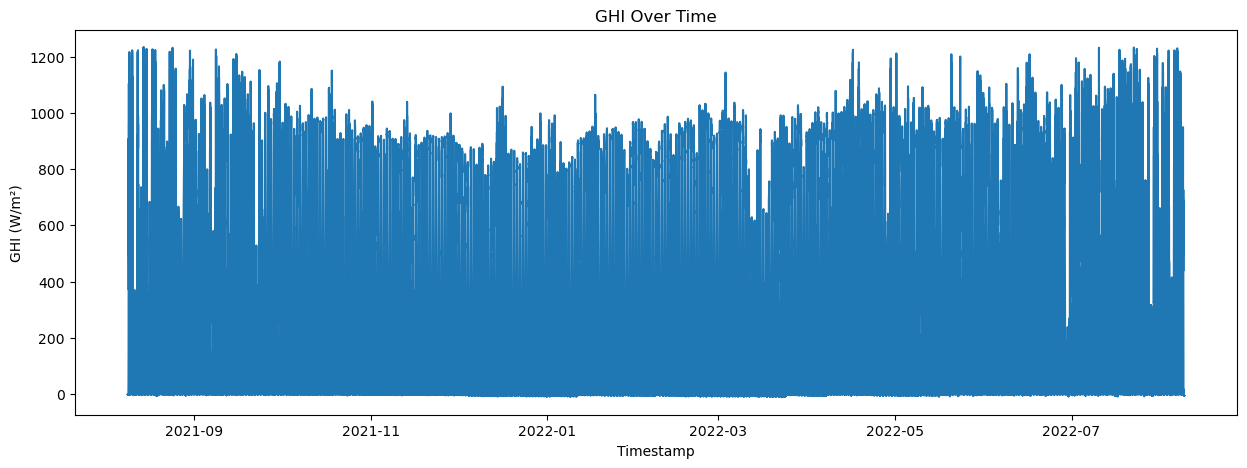

In [27]:
plt.figure(figsize=(15,5))
plt.plot(df_clean['Timestamp'], df_clean['GHI'])
plt.title("GHI Over Time")
plt.xlabel("Timestamp")
plt.ylabel("GHI (W/m²)")
plt.show()


## Cleaning Impact (ModA/ModB vs Cleaning Flag)

In [28]:
cleaning_effect = df_clean.groupby("Cleaning")[["ModA","ModB"]].mean()
cleaning_effect


,ModA,ModB
Cleaning,,
0,232.323881,224.95509
1,306.610124,301.45000


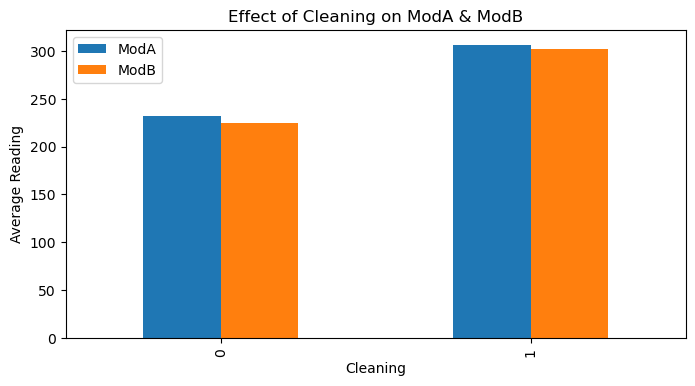

In [29]:
cleaning_effect.plot(kind="bar", figsize=(8,4), title="Effect of Cleaning on ModA & ModB")
plt.ylabel("Average Reading")
plt.show()


## Correlation Heatmap

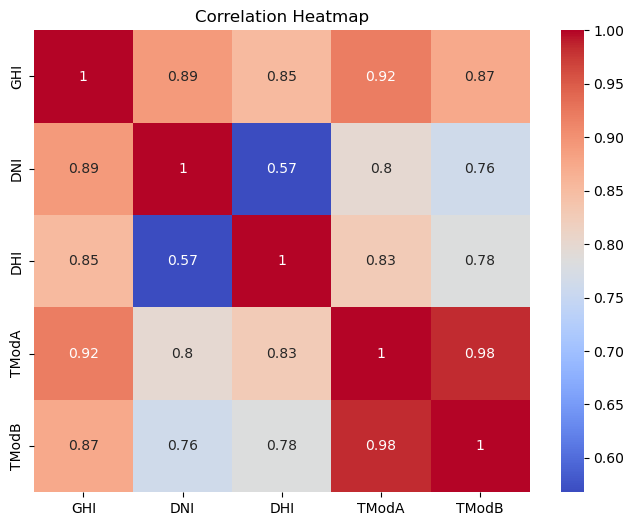

In [30]:
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Scatter Plots

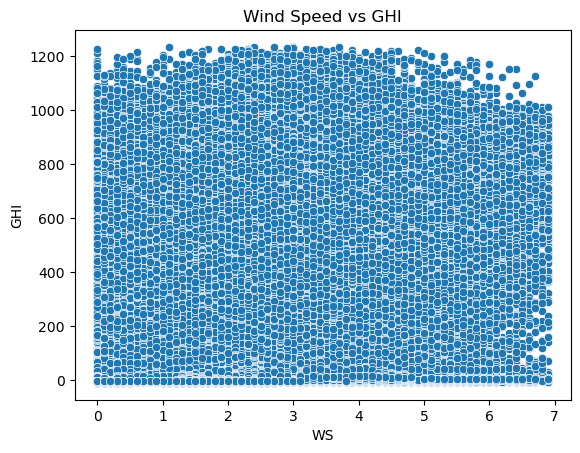

In [31]:
sns.scatterplot(data=df_clean, x="WS", y="GHI")
plt.title("Wind Speed vs GHI")
plt.show()


## Histograms

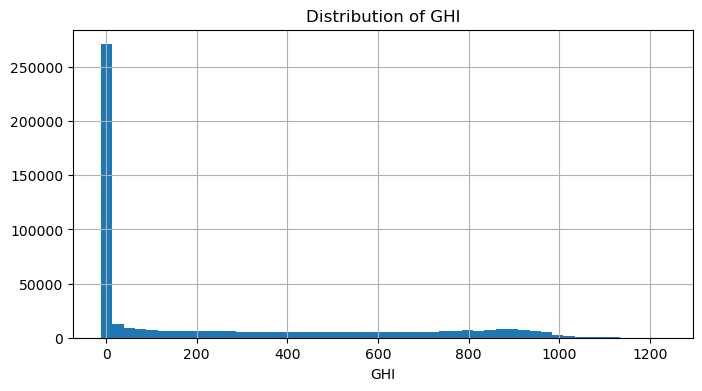

In [32]:
df_clean['GHI'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of GHI")
plt.xlabel("GHI")
plt.show()


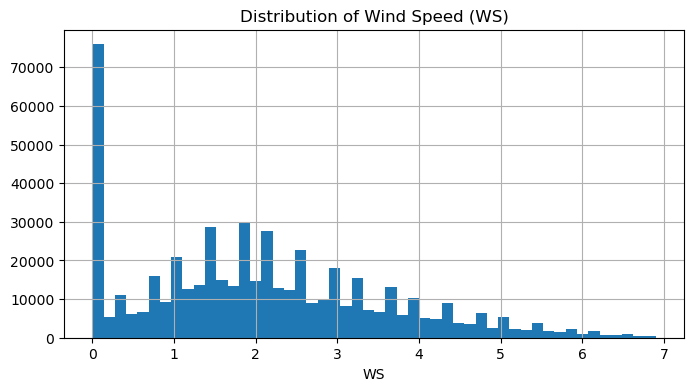

In [33]:
df_clean['WS'].hist(bins=50, figsize=(8,4))
plt.title("Distribution of Wind Speed (WS)")
plt.xlabel("WS")
plt.show()


## Bubble Chart

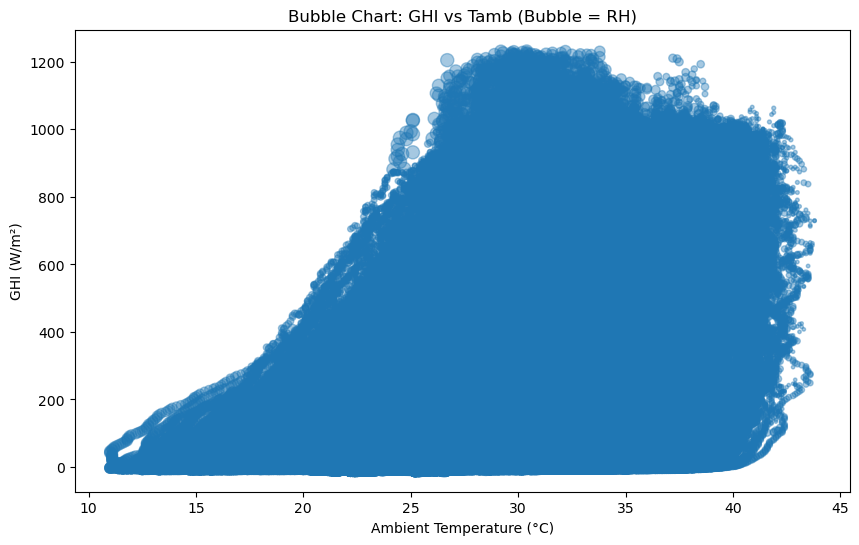

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(
    df_clean['Tamb'], 
    df_clean['GHI'], 
    s=df_clean['RH'],  # bubble size = humidity
    alpha=0.4
)
plt.title("Bubble Chart: GHI vs Tamb (Bubble = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.show()


## References

### 🔗 References
- Z-Score Outlier Detection: https://www.statisticshowto.com/probability-and-statistics/z-score/
- Seaborn Visualization Docs: https://seaborn.pydata.org/
- Time Series EDA Guide: https://pandas.pydata.org/docs/
- Wind Rose Examples: https://matplotlib.org/stable/gallery/specialty_plots/windrose.html
